### Simulation Case3

In [21]:
%store -r r1_series_value
%store -r r2_series_value
%store -r vx_chosen
%store -r Vcc
%store -r vref
%store -r rg
%store -r rf
%store -r x1
%store -r x2
r1_series_value=r1_series_value
r2_series_value=r2_series_value
vx_chosen=vx_chosen
vref=vref
rg=rg
rf=rf
vcc=Vcc
x1=x1
x2=x2
rf,rg,r1_series_value,r2_series_value,vx_chosen,vref,vcc


In [22]:
#Specify Amplitude and DC-Offset for Input signal
amplitude=abs(float(x1)-float(x2))/2
dc_offset=0

In [23]:
%matplotlib inline
# %pip install sympy numpy pyspice import-ipynb
#dill.load_session(session_file_name)
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown as md
sp.init_printing()

In [24]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import SubCircuit,Circuit, SubCircuitFactory
from PySpice.Spice.Parser import SpiceParser
from PySpice.Unit import *

Set Offset and Amplitude in SIN function


In [25]:
circuit = Circuit('Case3')
circuit.include('./spice-libs/TL071.301')

circuit.V(1, 'Vcc', circuit.gnd, 'dc 12')
circuit.V(2, 'Vee', circuit.gnd, 'dc -12')
circuit.V(3, 'Vx', circuit.gnd, 'dc 12')
circuit.V(4, 'Vin', circuit.gnd, f'SIN({dc_offset},{amplitude},1000)')  # DC:0V, Vpp=10


circuit.R(1, 'Vx', 'u1_plus', 2000)
circuit.R(2, 'u1_plus', circuit.gnd, 770)


# Rg
circuit.R(3, 'Vin', 'u1_minus', 20000)
# Rf
circuit.R(4, 'u1_minus', 'u1_out', 60000)
# Rout
circuit.R(5, 'u1_out', 'Vout', 1000)
# 1in+ 1in- vcc+ vcc- 1out
circuit.X(1, 'TL071', 'u1_plus', 'u1_minus', 'Vcc', 'Vee', 'u1_out')

# set calculated values
circuit.V3.dc_value = vx_chosen
circuit.R1.resistance = r1_series_value
circuit.R2.resistance = r2_series_value
circuit.R3.resistance = rg
circuit.R4.resistance = rf

simulator = circuit.simulator()


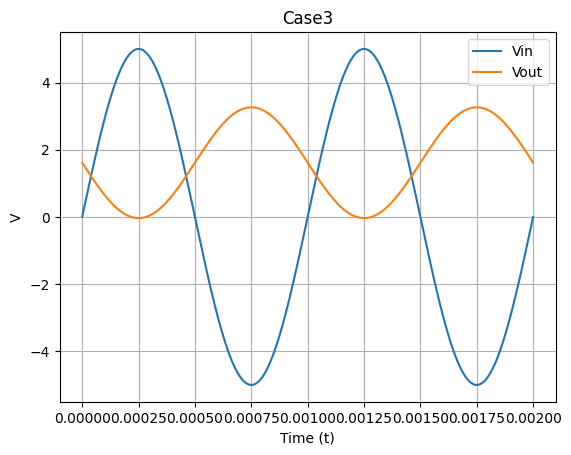

In [26]:
analysis = simulator.transient(step_time=1@u_us, end_time=2@u_ms)

plt.plot(analysis.time, analysis.Vin, label='Vin')
plt.plot(analysis.time, analysis.Vout, label='Vout')
plt.title('Case3')
plt.xlabel('Time (t)')
plt.ylabel('V')
plt.legend()
plt.grid()


In [27]:
analysis.Vout.max(), analysis.Vout.min()


(WaveForm  3.2618351090854825@V, WaveForm  -0.03484873554636699@V)

In [28]:
analysis.Vin.max(),analysis.Vin.min()

(WaveForm  4.999999879700319@V, WaveForm  -4.999999879700319@V)

<div>
<img src="images/case3.png" width="500"/>
</div>


In [29]:
md(f"### $ R_f={rf:.0f}\Omega,R_g={rg:.0f}\Omega,R_1={r1_series_value:.0f}\Omega,R_2={r2_series_value:.0f}\Omega,V_x={vx_chosen}V,V_ref={vref:.3f}V$")


### $ R_f=30000\Omega,R_g=91000\Omega,R_1=240000\Omega,R_2=27000\Omega,V_x=12V,V_ref=1.222V$